In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read the dataset to the python environment.

In [2]:
db=pd.read_csv(r"C:\Users\shajeer\Desktop\iris.csv")

In [3]:
db

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
db.shape

(150, 5)

In [5]:
db.tail

<bound method NDFrame.tail of       SL   SW   PL   PW  Classification
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    NaN  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  NaN  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

In [6]:
db.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# 2. Do necessary pre-processing steps.

filling missing values

In [7]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
for i in ['SL','SW','PL']:
    db[i]=db[i].fillna(db[i].median())

In [9]:
db.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Text(0.5, 1.0, 'title')

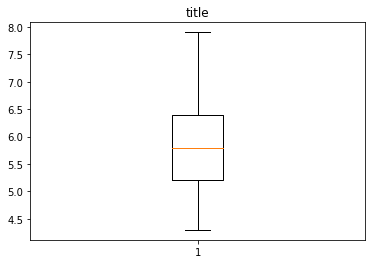

In [10]:
plt.boxplot(db['SL'])
plt.title('title')

Text(0.5, 1.0, 'title')

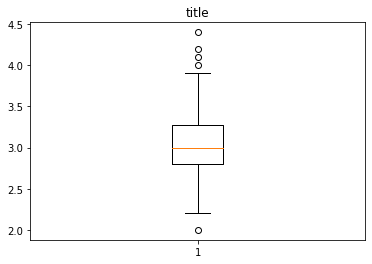

In [11]:
plt.boxplot(db['SW'])
plt.title('title')

In [12]:
Q1=np.percentile(db['SW'],25,interpolation='midpoint')
Q2=np.percentile(db['SW'],50,interpolation='midpoint')
Q3=np.percentile(db['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [13]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

2.1249999999999996
3.9250000000000003


In [14]:
outlier=[]
for x in db['SW']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [15]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [16]:
ind1=db['SW']>up_lim
db.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [17]:
db.drop([14, 15, 32, 33],inplace=True)

Text(0.5, 1.0, 'title')

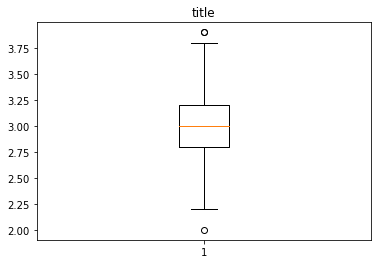

In [18]:
plt.boxplot(db['SW'])
plt.title('title')

Text(0.5, 1.0, 'title')

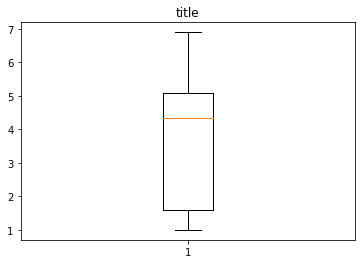

In [19]:
plt.boxplot(db['PL'])
plt.title('title')

Text(0.5, 1.0, 'title')

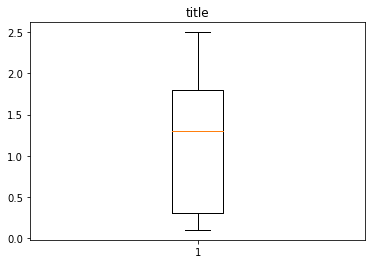

In [20]:
plt.boxplot(db['PW'])
plt.title('title')

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

label encoding

In [21]:
x = db.iloc[:,:-1].values
y = db.iloc[:,-1].values

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[15  0  0]
 [ 0 13  0]
 [ 0  0  9]]


1.0

KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[15  0  0]
 [ 0 13  0]
 [ 0  0  9]]


1.0

In [27]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [28]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[15  0  0]
 [ 0 13  0]
 [ 0  0  9]]


1.0

Decision tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [32]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[15  0  0]
 [ 0 13  0]
 [ 0  1  8]]


0.972972972972973

Kernal SVM

In [29]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [30]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  1  0]
 [ 0 13  0]
 [ 0  0  9]]


0.972972972972973

All the classification modals performs Good